# **Part 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas openpyxl

In [ ]:
import pandas as pd

# Load the Excel file
excel_file = '/content/drive/MyDrive/datasets/2k/Quantitative_Task_-_Data_Analysis_-_Auction.xlsx'

# Load the "Value Info" sheet into a DataFrame
value_info_df = pd.read_excel(excel_file, sheet_name='Value Info')

# Save the "Value Info" DataFrame to a CSV file
value_info_csv = '/content/drive/MyDrive/datasets/2k/value_info.csv'  # Replace with your desired CSV file path
value_info_df.to_csv(value_info_csv, index=False)

# Load the "Demographic Info" sheet into a DataFrame
demographic_info_df = pd.read_excel(excel_file, sheet_name='Demographic Info')

# Save the "Demographic Info" DataFrame to a CSV file
demographic_info_csv = '/content/drive/MyDrive/datasets/2k/demographic_info.csv'
demographic_info_df.to_csv(demographic_info_csv, index=False)

In [ ]:
# List of columns to get unique values from
columns = ['Title', 'Address City', 'Contact Allowed', 'Source of Customer']

# Loop through each column and print unique values
for column in columns:
    unique_values = demographic_info_df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)

Unique values in Title:
['Mr' 'Mrs' 'Ms' nan 'Miss']
Unique values in Address City:
['Malahide' 'Dublin' 'Limerick' 'Dungarvan' 'Clonmel' 'Newbridge' 'Galway'
 'Navan' 'Tullamore' 'Bray' 'Cork' 'Mullingar' 'Kildare' 'Kilkenny'
 'Ennis' 'Cavan' 'Tralee' 'Lucan' 'Clondalkin' 'Dundalk' 'Greystones'
 'Tallaght' 'Waterford' 'Portlaoise' 'Ashbourne' 'Naas' 'Wexford'
 'Maynooth' 'Leixlip' 'Ballinasloe' 'Castlebar' 'Rathfarnham' 'Swords'
 'Kells' 'Athlone' 'Mallow' 'Gorey' 'Blackrock' 'Nenagh' 'Ballina' 'Sligo'
 'Enniscorthy' 'Carlow' 'Killarney' 'Letterkenny' 'Drogheda' 'Longford'
 'Athy' 'Balbriggan' 'Celbridge']
Unique values in Contact Allowed:
['Y' 'N']
Unique values in Source of Customer:
['Organic Search' 'Affiliates' 'Paid Social' 'Paid Search' 'Direct']


In [ ]:
# Replace missing values in the Title column with 'Unknown'
demographic_info_df['Title'].fillna('Unknown', inplace=True)

In [ ]:
# Left join to keep all customers from demographic_info_df, and fill missing values from value_info_df
merged_df = pd.merge(demographic_info_df, value_info_df, on='Customer ID', how='left')

# Fill missing profit and order data with 0, as these customers made no purchases
merged_df['1st Order Profit'].fillna(0, inplace=True)
merged_df['Subsequent Order Profit'].fillna(0, inplace=True)
merged_df['Subsequent Orders Count'].fillna(0, inplace=True)
merged_df['Total value of all promotions'].fillna(0, inplace=True)

# Calculate total profit (which will be 0 for customers who made no purchases)
merged_df['Total Profit'] = merged_df['1st Order Profit'] + merged_df['Subsequent Order Profit']

# Display the merged dataframe
merged_df.head()

,Customer ID,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Total Profit
0,1,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,8.97261,5.30772,1.0,6.600000,14.28033
1,2,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,7.92288,70.15680,7.0,6.639453,78.07968
2,3,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,14.06160,50.80320,7.0,0.000000,64.86480
3,4,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,14.07672,0.00000,0.0,0.000000,14.07672
4,5,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,22.68000,68.22144,9.0,14.771948,90.90144


## **ChannelPerformance**

### Calculate ROI by Channel

ROI for Paid Search and Affiliates:
Source of Customer
Paid Search    0.632966
Affiliates    -0.307905
dtype: float64


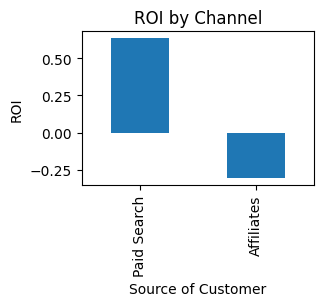

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Source of Customer' to sum total profits
channel_profit = merged_df.groupby('Source of Customer')['Total Profit'].sum()

# Acquisition costs (in EUR) for Paid Search and Affiliates from Jan, Feb, Mar 2013
cost_data = {
    'Paid Search': (41512 + 61243 + 84597.88),  # Total cost for Jan-Mar 2013
    'Affiliates': (16421 + 42101 + 141321)      # Total cost for Jan-Mar 2013
}

# A new ROI column, setting NaN where cost data is not available
roi = pd.Series(index=channel_profit.index)

# ROI for Paid Search and Affiliates where cost data is available
roi['Paid Search'] = (channel_profit['Paid Search'] - cost_data['Paid Search']) / cost_data['Paid Search']
roi['Affiliates'] = (channel_profit['Affiliates'] - cost_data['Affiliates']) / cost_data['Affiliates']

# ROI for Paid Search and Affiliates
print("ROI for Paid Search and Affiliates:")
print(roi[['Paid Search', 'Affiliates']])

# Plot ROI for Paid Search and Affiliates
roi[['Paid Search', 'Affiliates']].plot(kind='bar', title='ROI by Channel', figsize=(3, 2))
plt.ylabel('ROI')
plt.show()

**ROI for Paid Search and Affiliates:**
   - **Paid Search** has a positive ROI of **0.63** (63% return). This means that for every euro spent on Paid Search, the retailer is gaining back €1.63 in profit.
   - **Affiliates** has a negative ROI of **-0.31**. This means that for every euro spent on Affiliates, the retailer is losing around €0.31. This indicates that the Affiliates channel is underperforming in terms of profitability compared to Paid Search.

### Calculate Customer Lifetime Value (CLV) by Channel


Customer Lifetime Value (CLV) by Channel:
Source of Customer
Affiliates        35.757588
Direct            47.513864
Organic Search    48.557919
Paid Search       46.937858
Paid Social       60.730571
Name: Total Profit, dtype: float64


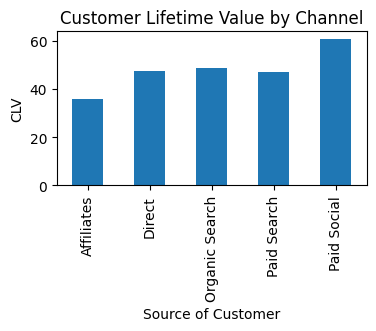

In [ ]:
# Group by channel and calculate the average CLV
clv_per_channel = merged_df.groupby('Source of Customer')['Total Profit'].mean()

# Display CLV by channel
print("\nCustomer Lifetime Value (CLV) by Channel:")
print(clv_per_channel)

# Plot CLV by channel
clv_per_channel.plot(kind='bar', title='Customer Lifetime Value by Channel', figsize=(4, 2))
plt.ylabel('CLV')
plt.show()

**Customer Lifetime Value (CLV) by Channel:**
   - **Paid Social** customers provide the highest CLV at **€60.73**, indicating that users acquired via Paid Social tend to generate the most total profit over their lifetime.
   - **Organic Search** and **Paid Search** perform relatively well with CLVs of **€48.56** and **€46.94**, respectively. These channels are still strong in terms of long-term customer value.
   - **Affiliates** have the lowest CLV at **€35.76**, supporting the earlier finding that Affiliates may not be the most valuable channel to focus on.
   - **Direct** customers have a CLV of **€47.51**, indicating that users who directly visit the site tend to generate good value over time.

### Calculate Conversion Rate by Channel


Conversion Rate by Channel:
Source of Customer
Affiliates        0.643226
Direct            0.628866
Organic Search    0.633103
Paid Search       0.619669
Paid Social       0.661942
Name: Customer ID, dtype: float64


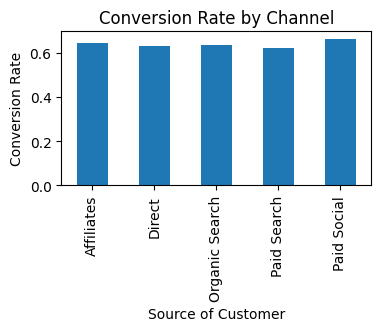

In [ ]:
# Calculate total customers per channel (users who registered)
total_customers_by_channel = merged_df.groupby('Source of Customer')['Customer ID'].count()

# Calculate customers who placed a subsequent order (Subsequent Orders Count > 0)
customers_with_subsequent_orders = merged_df[merged_df['Subsequent Orders Count'] > 0].groupby('Source of Customer')['Customer ID'].count()

# Calculate conversion rate (subsequent orders / total customers)
conversion_rate = customers_with_subsequent_orders / total_customers_by_channel

# Display conversion rate per channel
print("\nConversion Rate by Channel:")
print(conversion_rate)

# Plot Conversion Rate by channel
conversion_rate.plot(kind='bar', title='Conversion Rate by Channel', figsize=(4, 2))
plt.ylabel('Conversion Rate')
plt.show()

**Conversion Rate by Channel:**
   - **Paid Social** has the highest conversion rate at **66%**, meaning it’s effective at converting users into repeat buyers. This, combined with the high CLV, shows that Paid Social is a strong acquisition channel.
   - **Affiliates** has a relatively high conversion rate of **64.32%**, which contrasts with the negative ROI and low CLV. This suggests that while the channel converts customers well, it may not be attracting high-value customers.
   - The other channels — **Direct**, **Organic Search**, and **Paid Search** — have conversion rates in the range of **61.97% - 63.81%**, which are relatively stable but slightly lower than Paid Social and Affiliates.

### **Where and how should the operator focus its efforts?**
1. **Focus on Paid Social**: Since Paid Social has the highest CLV and conversion rate, it’s a strong channel for customer acquisition. Consider increasing the budget or further optimizing campaigns for this channel.
   
2. **Reassess Affiliates**: Despite having a decent conversion rate, Affiliates have a negative ROI and the lowest CLV. It may be worthwhile to either reduce spending on Affiliates or reevaluate the partnerships driving traffic through this channel.
   
3. **Maintain Investment in Paid Search**: Paid Search has a positive ROI and solid CLV. Continuing to invest here seems worthwhile, but there may be opportunities to optimize costs or improve the CLV further.
   
4. **Optimize Direct and Organic Search**: Both channels have decent CLV and conversion rates, but further optimization (e.g., better engagement, personalized offers) could increase lifetime value and potentially improve their performance.

## **Demographic Differences**

### Age-based Analysis

False


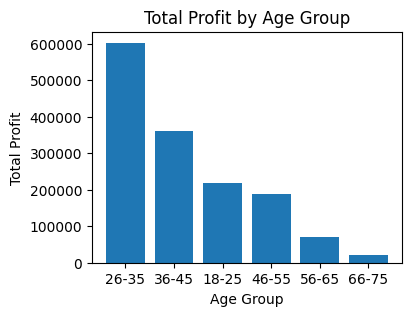

In [ ]:
# Convert 'Date Of Birth' into datetime format
merged_df['Date Of Birth'] = pd.to_datetime(merged_df['Date Of Birth'], errors='coerce')
merged_df['Registration Date'] = pd.to_datetime(merged_df['Registration Date'], errors='coerce')

has_nat = merged_df['Registration Date'].isna().any()
print(has_nat)

# 'Age' column based on the date of birth and the registration date
merged_df['Age'] = (merged_df['Registration Date'] - merged_df['Date Of Birth']).dt.days // 365

# Age group ranges (18-25, 26-35, 36-45, etc.)
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and calculate total profit and average promotion usage per group, with observed=True
age_group_analysis = merged_df.groupby('Age Group', observed=True).agg(
    total_profit=('Total Profit', 'sum'),
    avg_promotion_usage=('Total value of all promotions', 'mean'),
    customer_count=('Customer ID', 'count')
)

# Sort by total profit to see which age group spends the most
age_group_analysis = age_group_analysis.sort_values(by='total_profit', ascending=False)

# Bar Graph for Total Profit by Age Group
plt.figure(figsize=(4,3))
plt.bar(age_group_analysis.index, age_group_analysis['total_profit'])
plt.title('Total Profit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Profit')
plt.show()

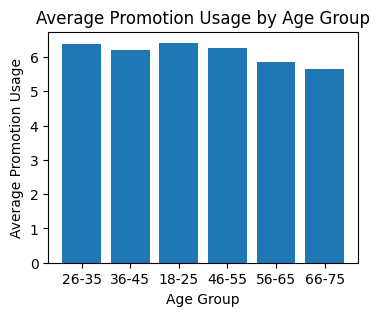

In [ ]:
# Bar Graph for Average Promotion Usage by Age Group
plt.figure(figsize=(4,3))
plt.bar(age_group_analysis.index, age_group_analysis['avg_promotion_usage'])
plt.title('Average Promotion Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Promotion Usage')
plt.show()

**Age Group Performance:**
- The age group **26-35** generates the highest total profit (€603,218), with an average promotion usage of around 6.39 per customer, representing the largest customer base (13,732 customers). This group is the most profitable.
- The next highest is the **36-45** group, with a total profit of €361,709 and slightly lower average promotion usage (6.20).
- Interestingly, the youngest group (**18-25**) is third in total profit (€219,859) but has the highest average promotion usage (6.41). This could indicate that while this group contributes to profit, they rely more heavily on promotions.
- Older age groups like **46-55** and **56-65** contribute progressively less profit, with lower customer counts, but also show relatively balanced promotion usage compared to younger customers.

### Location-based Analysis

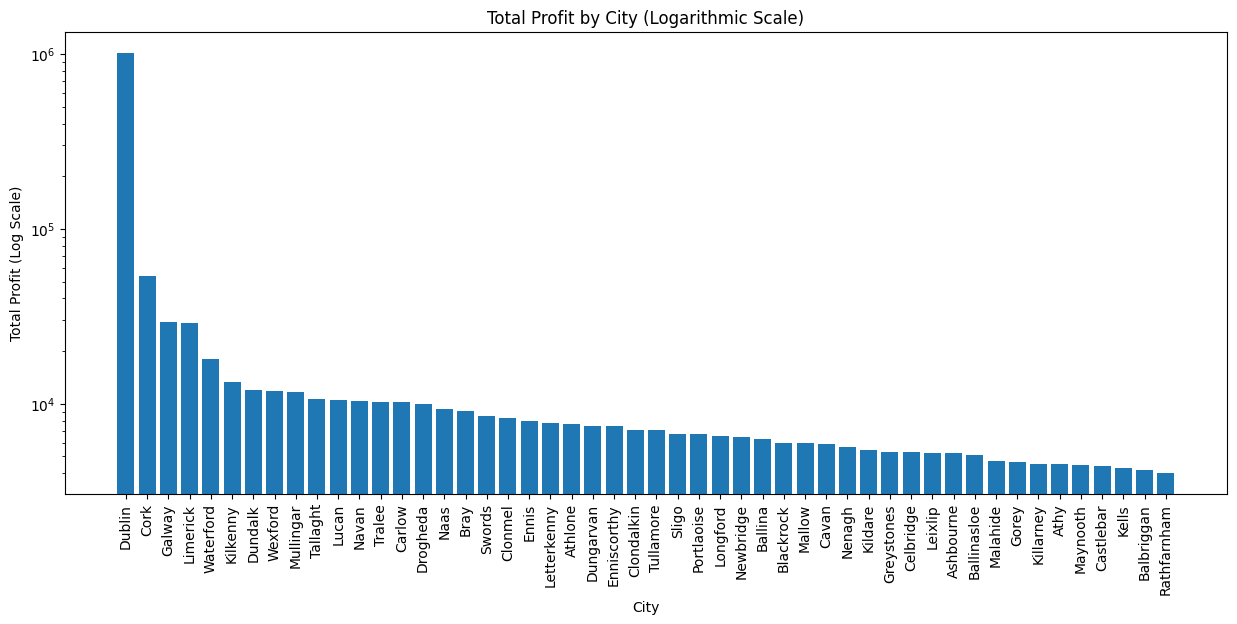

In [ ]:
# Group by city and calculate total profit, and count of customers per city
city_analysis = merged_df.groupby('Address City').agg(
    total_profit=('Total Profit', 'sum'),
    customer_count=('Customer ID', 'count')
)

# Sort by total profit to see the most profitable cities
city_analysis = city_analysis.sort_values(by='total_profit', ascending=False)

# Plot total profit by city with a log scale
plt.figure(figsize=(15,6))
plt.bar(city_analysis.index, city_analysis['total_profit'])
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Total Profit by City (Logarithmic Scale)')
plt.xlabel('City')
plt.ylabel('Total Profit (Log Scale)')
plt.xticks(rotation=90)
plt.show()

**Location Insights:**
- **Dublin** is by far the most profitable city, generating over €1 million in total profit from 21,753 customers. This dominance suggests that marketing efforts should focus on maximizing customer retention and engagement in Dublin.
- **Cork** and **Galway** contribute much smaller profits (€53,790 and €29,473, respectively) with customer bases of just over 1,000 and 661. These smaller cities may offer growth opportunities if targeted campaigns could increase acquisition and retention.
- **Limerick** and **Waterford** follow, also with smaller contributions, indicating regional variation in profitability.

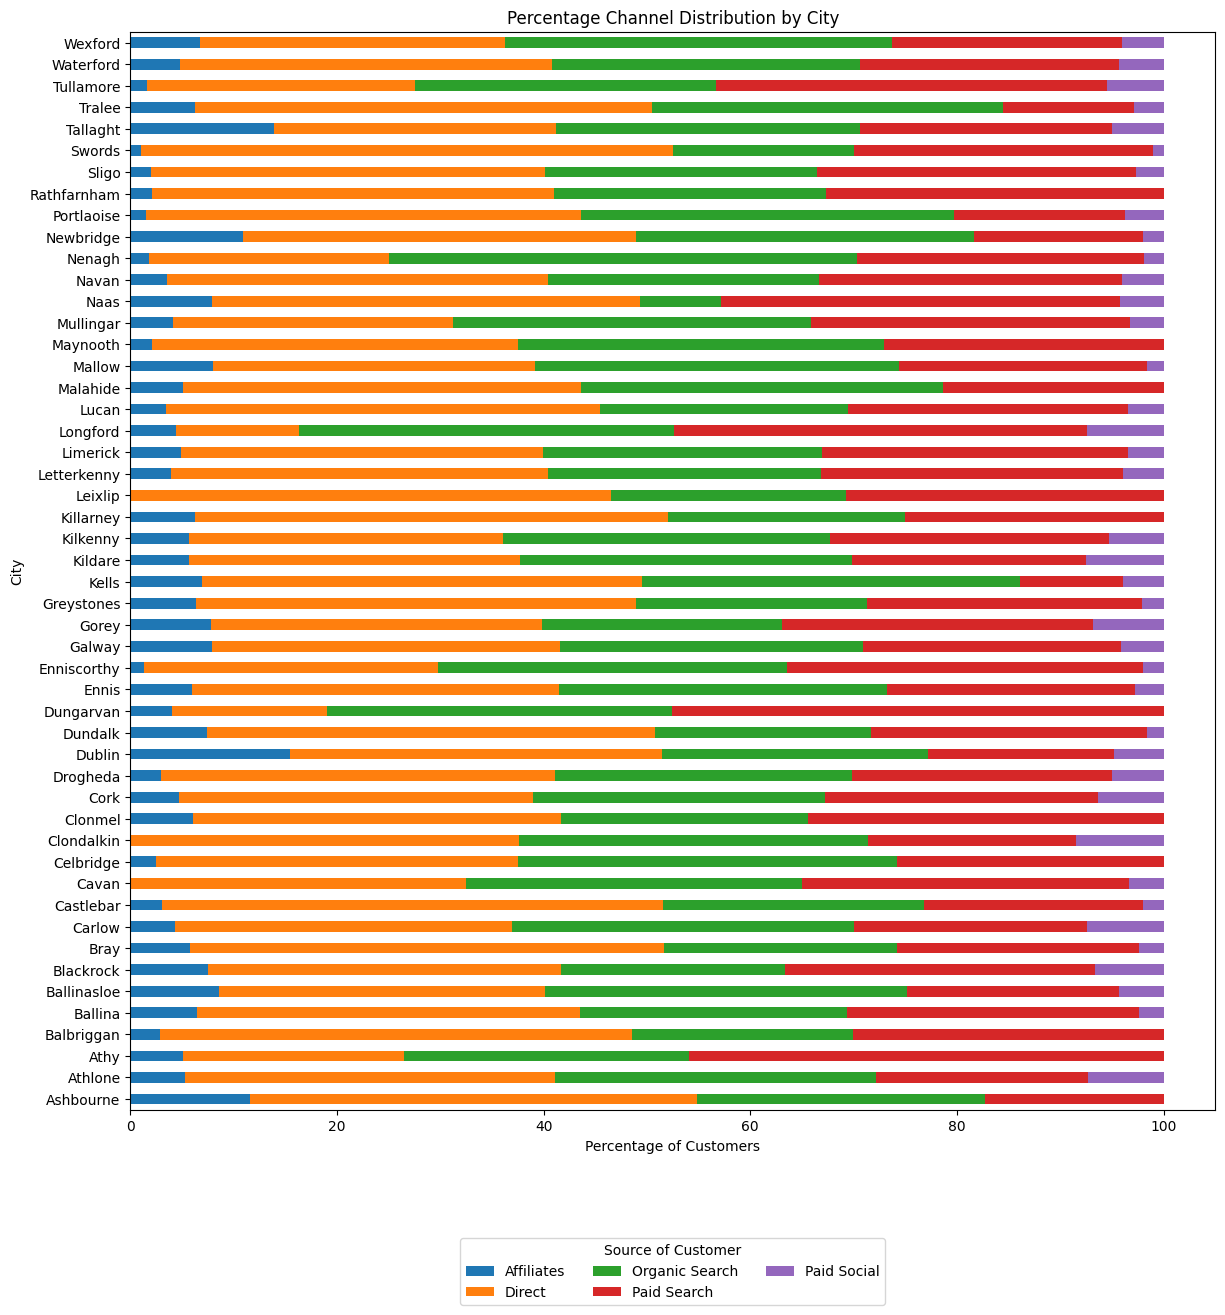

In [ ]:
# Analyze the affinity for specific channels by city
channel_by_city = merged_df.groupby(['Address City', 'Source of Customer']).size().unstack(fill_value=0)

# Normalize channel_by_city to percentages
channel_by_city_percent = channel_by_city.div(channel_by_city.sum(axis=1), axis=0) * 100

# Stacked Horizontal Bar Plot for Percentage Channel Distribution by City
channel_by_city_percent.plot(kind='barh', stacked=True, figsize=(14, 14))
plt.title('Percentage Channel Distribution by City')
plt.ylabel('City')
plt.xlabel('Percentage of Customers')

# Move legend to bottom center
plt.legend(title='Source of Customer', bbox_to_anchor=(0.5, -0.15), loc='center', ncol=3)
plt.show()

**Channel Affinity by Location:**
This channel affinity data helps identify customer preferences across different cities, allowing the company to tailor marketing efforts more effectively. For example, Dublin shows the highest usage across all channels, including direct and paid social, indicating strong multi-channel engagement. Smaller cities like Athlone and Ashbourne show stronger engagement with direct and organic search channels, suggesting the need for more personalized and location-specific campaigns. Understanding these geographic preferences can help the retailer optimize its advertising spend and focus efforts where channels are most effective for customer acquisition.

### **Where and how should the operator focus its efforts?**
- **Focus on the 26-35 and 36-45 age groups**: These groups drive the majority of the profits and have reasonable promotion usage, suggesting that well-targeted marketing campaigns can further enhance their engagement.
- **Expand Paid Social in younger cities**: Given the low presence of Paid Social in most cities, there may be untapped potential, especially in cities like **Balbriggan** and **Ballina**.
- **Leverage promotions strategically**: The **18-25** group uses promotions the most. Promotional efforts should be carefully managed to maximize customer lifetime value (CLV) in this group while balancing profitability.
- **Target Dublin heavily**: Since it’s the most profitable city by far, focusing retention efforts there could yield substantial returns. Moreover, analyzing specific campaigns within Dublin might identify further opportunities.

## **Customer Behavior**

### **Promotional Sensitivity**
Customers who make frequent orders but redeem high discounts are likely more sensitive to promotions. We’ll identify such customers by looking at their total promotion value and order frequency.

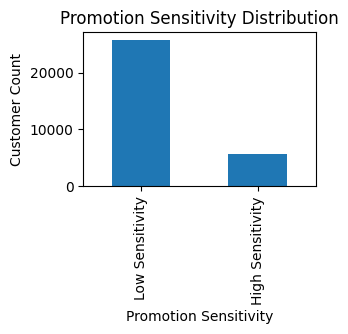

In [ ]:
# Calculate the total value of promotions redeemed per customer
promotional_sensitivity_df = merged_df[['Customer ID', 'Subsequent Orders Count', 'Total value of all promotions']].copy()

# Define 'promotion sensitive' customers as those with high promotion usage and multiple orders
promotional_sensitivity_df.loc[:, 'Promotion Sensitivity'] = promotional_sensitivity_df.apply(
    lambda row: 'High Sensitivity' if row['Subsequent Orders Count'] > 3 and row['Total value of all promotions'] > 10 else 'Low Sensitivity', axis=1
)

# Display high promotion sensitivity customers
high_sensitivity_customers = promotional_sensitivity_df[promotional_sensitivity_df['Promotion Sensitivity'] == 'High Sensitivity']

# Promotion sensitivity distribution
promotional_sensitivity_df['Promotion Sensitivity'].value_counts().plot(kind='bar', title='Promotion Sensitivity Distribution', figsize=(3, 2))
plt.ylabel('Customer Count')
plt.show()

High Sensitivity Customers (17.85%): These customers are likely more responsive to promotional campaigns. Targeting them with personalized offers or loyalty programs may result in higher retention and repeat purchases.

Low Sensitivity Customers (82.15%): The majority of customers fall into this category, indicating they are either less influenced by promotions or not as engaged. This group may require different marketing strategies, such as focusing on product quality, customer service, or non-promotional incentives to increase engagement.

### **Churn Risk**
Customers who place a 1st order but no subsequent orders are at risk of churn. Identify them and analyze their demographic and acquisition source trends to understand why they might not have returned.

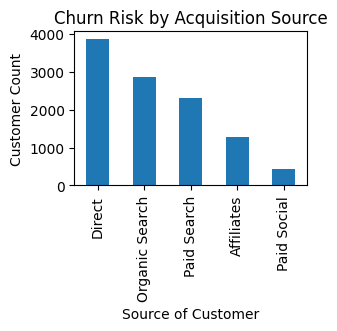

In [ ]:
# Identify churn risk customers (1st order but no subsequent orders)
churn_risk_customers_df = merged_df[(merged_df['Subsequent Orders Count'] == 0) & (merged_df['1st Order Profit'] > 0)]

# Group churn risk customers by acquisition source and demographics
churn_risk_analysis = churn_risk_customers_df.groupby(['Source of Customer', 'Address City']).size().reset_index(name='Customer Count')

# Churn risk by source
churn_risk_customers_df['Source of Customer'].value_counts().plot(kind='bar', title='Churn Risk by Acquisition Source', figsize=(3, 2))
plt.ylabel('Customer Count')
plt.show()

1. **High Churn from Direct Acquisition**: With the highest churn risk among all channels, direct acquisition strategies (e.g., direct website visits, email marketing) may need to incorporate better retention tactics. This could involve personalized follow-ups or post-purchase engagement to encourage repeat orders.

2. **Organic Search Vulnerability**: Customers acquired through organic search show significant churn risk. This suggests that while organic search effectively brings customers in, it might not deliver the best first-time experience or brand connection. Enhancing user experience or targeted remarketing could reduce churn.

3. **Affiliate and Paid Social Channels Have Lower Churn Risk**: Customers acquired via affiliate programs and paid social ads seem to have a lower churn risk. This could suggest that these channels attract more engaged or loyal customers. Capitalizing on these channels with more focus on expanding these strategies may lead to more loyal customers.

### **Where and how should the operator focus its efforts?**
Target High-Sensitivity Customers, for those highly sensitive to promotions, tailor ongoing engagement with regular promotional emails and seasonal discounts.

Consider creating segmented campaigns that only go out to high-sensitivity customers to maximize ROI from these promotions.
Diversify Offers for Low-Sensitivity Customers: Since low-sensitivity customers do not respond heavily to discounts, focus on creating a more personalized shopping experience. This could include:

- Curated product suggestions.
- Early access to new arrivals or members-only events.
- Loyalty programs that focus on non-monetary benefits such as exclusive previews or services, rather than discounts.

# **Part 2**

### Understanding URL Structure:

1. **Base URL for Men's Shirts:**
   - `https://www.marksandspencer.com/ie/l/men/mens-shirts`
   - This is the default URL for browsing men's shirts.

2. **Filters:**
   - **Fit Filters**: The URL updates when specific fit types (e.g., Regular Fit, Slim Fit) are selected:
     - Regular Fit: `/fs5/regular-fit`
     - Slim Fit: `/fs5/slim-fit`
   - **Color Filters**: The URL updates similarly when colors are applied:
     - Blue: `/fs5/blue`
     - White: `/fs5/white`
     - Green: `/fs5/green`
   - **Combined Filters**: For combinations like Regular Fit + Blue, the URL becomes more complex:
     - Example: `?filter=Colour%253DBlue%7EFit%253DRegular%2520fit`

3. **Differences in Pre-defined vs Manually Applied Filters:**
   - The manually applied filters use simpler query parameters like `?filter=Colour%253DWhite%7EFit%253DRegular%2520fit`.
   - The pre-defined recommended filters add additional parameters like `#intid=finav_mw_plp` for tracking purposes. These pre-defined filters appear to be for promotional purposes and affect how URLs are structured.

### List of Campaign URLs:

1. **Regular Fit Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/regular-fit`
   - Pre-defined: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/regular-fit#intid=finav_mw_plp_Regular%20Fit%20Shirts`

2. **Slim Fit Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/slim-fit`
   - Pre-defined: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/slim-fit#intid=finav_mw_plp_Slim%20Fit%20Shirts`

3. **Blue Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/blue`
   - Pre-defined: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/blue#intid=finav_mw_plp_Blue%20Shirts`

4. **White Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/white`
   - Pre-defined: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/white#intid=finav_mw_plp_White%20Shirts`

5. **Green Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/green`

6. **Regular Fit Blue Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts?filter=Colour%253DBlue%7EFit%253DRegular%2520fit`
   - Pre-defined: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/regular-fit/blue#intid=finav_mw_plp_Blue%20Shirts`

7. **Regular Fit White Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts?filter=Colour%253DWhite%7EFit%253DRegular%2520fit`
   - Pre-defined: `https://www.marksandspencer.com/ie/l/men/mens-shirts/fs5/regular-fit/white#intid=finav_mw_plp_White%20Shirts`

8. **Regular Fit Green Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts?filter=Colour%253DGreen%7EFit%253DRegular%2520fit`

9. **Slim Fit Blue Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts?filter=Colour%253DBlue%7EFit%253DSlim%2520fit`

10. **Slim Fit White Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts?filter=Colour%253DWhite%7EFit%253DSlim%2520fit`
   - Pre-defined: `https://www.marksandspencer.com/ie/l/men/mens-shirts/formal-shirts/fs5/slim-fit/white#intid=finav_mw_plp_White%20Shirts`

11. **Slim Fit Green Shirts:**
   - Manually filtered: `https://www.marksandspencer.com/ie/l/men/mens-shirts?filter=Colour%253DGreen%7EFit%253DSlim%2520fit`

---

### Key Takeaways:
- **Manually Applied Filters**: URLs change dynamically based on the filters used. These URLs can be constructed by appending filter parameters for both fit and color.
- **Pre-defined Filters**: These URLs include tracking information (e.g., `#intid=...`) that corresponds to specific campaigns or marketing analytics.

### Focus for the Operator:
- **Use pre-defined URLs for campaign tracking**: These URLs can provide additional insights into user interactions and track performance effectively.
- **Leverage dynamic filtering for SEO**: Ensure that manually generated URLs are optimized for search engines to make sure specific product pages are easier to find. This can help in driving organic traffic directly to the right product categories.